In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import nltk
import contractions

from wordcloud import WordCloud
from termcolor import colored
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# load data
df = pd.read_csv('amazon_test.csv', header=None, names=['Rating','Title','Review'])
df.head()

,Rating,Title,Review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [21]:
df.shape

(400000, 3)

# Clean and processing data

In [22]:
# Random Sample Function 
def random_sample(data):
    return data.sample(frac = 0.25)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  400000 non-null  int64 
 1   Title   399976 non-null  object
 2   Review  400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [24]:
## Check changes
df = random_sample(df)
df.shape

(100000, 3)

In [25]:
## Set labels to 0 and 1
def decrease_label_by_one(label):
    return label - 1

df['Rating'] = df['Rating'].apply(decrease_label_by_one)

In [26]:
## Check changes
df.head()

,Rating,Title,Review
138609,1,Very action packed,It was an interesting movie. Colorful scenery....
25404,1,Bravo!! This is the best.,If you want to learn C++ then this is your cho...
180865,1,Worth watching.....,"The movie is cute, and has some great stuff in..."
109467,0,ring,I bought the ring for my 16 yr old granddaught...
375656,0,Very dissapointed mommy 2 be,I was extremely dissapointed with this cover. ...


In [27]:
## Count ratings
df.Rating.value_counts(normalize = True)

Rating
0    0.50172
1    0.49828
Name: proportion, dtype: float64

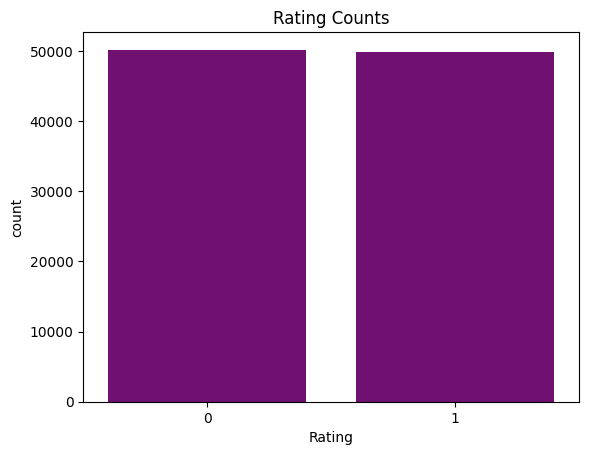

In [28]:
color_palette = ['purple', 'cyan']
sns.set_palette(color_palette) 
sns.countplot(x=df['Rating'])

plt.title('Rating Counts')
plt.show()

In [29]:
## Count null values
df.isnull().sum()

Rating    0
Title     6
Review    0
dtype: int64

In [30]:
# Assuming 'df' is your DataFrame
df.dropna(subset=['Title'], inplace=True)

In [31]:
# Verify the null counts after dropping
print(df.isnull().sum())

Rating    0
Title     0
Review    0
dtype: int64


In [32]:
# Reset indexing
df.reset_index(drop=True, inplace=True)
df.head()

,Rating,Title,Review
0,1,Very action packed,It was an interesting movie. Colorful scenery....
1,1,Bravo!! This is the best.,If you want to learn C++ then this is your cho...
2,1,Worth watching.....,"The movie is cute, and has some great stuff in..."
3,0,ring,I bought the ring for my 16 yr old granddaught...
4,0,Very dissapointed mommy 2 be,I was extremely dissapointed with this cover. ...


In [33]:
# Processing data
# Code Explanation:

# Text Cleaning:
# Uses regular expressions to remove non-alphanumeric and non-numeric characters from the text.
# Utilizes the contractions library to expand contractions and replace them with their full forms.
# Removes numeric digits from the text.
# Replaces the string " s " with a blank space.
# Converts the entire text to lowercase.
# Stopword Removal:
# Tokenizes the text using the nltk.word_tokenize function to split it into individual words.
# Filters out words from the text to remove those that are present in the set of stopwords (common words that don't contribute much meaning to the analysis).
# Text Normalization:
# Utilizes a stemmer (in this case, the SnowballStemmer) to reduce words to their base or root form.
# Applies the stemmer to each word in the tokenized text.
# Joins the normalized words back together into a text string.

In [37]:
def preprocess_text(text):
    # Text clean
    text = re.sub(r'[\W_]+', ' ', contractions.fix(re.sub(r'\d+', '', text.replace(' s ', ' ')))).lower()

    # Stopword removal
    tokens = nltk.word_tokenize(text)
    text = " ".join([token for token in tokens if token not in stop_words])
    
    return text

In [38]:
print(colored('Before of clean:\n', 'blue'), df.Review[8])
print(colored('After of clean:\n', 'blue'), preprocess_text(df.Review[8]))

Before of clean:
 This is the first and last Danzig album I'll own (and I'm thinking about selling it.) The popular and yet mediocre tracks like Mother have become beyond boring and over played on rock stations. As for the rest of the album that is less than mediocre, it seems it was thrown together without much creativity. It could be said, Danzig is close to being a one hit wonder. CLOSE to it. There are one or two other songs that are close to being decent; Twist of Cain being an example. I never thought much about the Misfits and Danzig is not much better. With this said, if Danzig is a leading band of Southern Rock, then this genre might be in trouble.
After of clean:
 first last danzig album thinking selling popular yet mediocre tracks like mother become beyond boring played rock stations rest album less mediocre seems thrown together without much creativity could said danzig close one hit wonder close one two songs close decent twist cain example never thought much misfits danzi

In [39]:
## Cleaning and processing on the Review variable
df['clean_review'] = df['Review'].apply(preprocess_text)

# Feature Engineering

In [40]:
# individual words considered as tokens
tokenized_review=df['clean_review'].apply(lambda x: x.split() )
tokenized_review.head()

0    [interesting, movie, colorful, scenery, intere...
1    [want, learn, c, choice, deitel, good, job, br...
2    [movie, cute, great, stuff, family, friendly, ...
3    [bought, ring, yr, old, granddaughter, xmas, j...
4    [extremely, dissapointed, cover, bought, quilt...
Name: clean_review, dtype: object

In [41]:
#Stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_review=tokenized_review.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_review.head()

0    [interest, movi, color, sceneri, interest, plo...
1    [want, learn, c, choic, deitel, good, job, bri...
2    [movi, cute, great, stuff, famili, friendli, e...
3    [bought, ring, yr, old, granddaught, xma, jan,...
4    [extrem, dissapoint, cover, bought, quilt, vel...
Name: clean_review, dtype: object

In [42]:
#Combine the words into single sentence
for i in range(len(tokenized_review)):
    tokenized_review[i]=" ".join(tokenized_review[i])

df['clean_review']=tokenized_review
df.head()

,Rating,Title,Review,clean_review
0,1,Very action packed,It was an interesting movie. Colorful scenery....,interest movi color sceneri interest plot remi...
1,1,Bravo!! This is the best.,If you want to learn C++ then this is your cho...,want learn c choic deitel good job bring book ...
2,1,Worth watching.....,"The movie is cute, and has some great stuff in...",movi cute great stuff famili friendli except t...
3,0,ring,I bought the ring for my 16 yr old granddaught...,bought ring yr old granddaught xma jan alreadi...
4,0,Very dissapointed mommy 2 be,I was extremely dissapointed with this cover. ...,extrem dissapoint cover bought quilt velour ve...


In [43]:
all_tokens = [token for sublist in tokenized_review for token in sublist]
# Count the number of unique tokens
unique_tokens = set(all_tokens)
total_unique_tokens = len(unique_tokens)
print(total_unique_tokens)

41


# Exploration Data Analysis (EDA)

In [44]:
## Frequency Words
words = Counter(' '.join(df['clean_review'].to_list()).split())
Frequency_words = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words = Frequency_words.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words['Rank'] = Frequency_words['Rank'].apply(lambda x : x+1)
Frequency_words.head(40)

,Rank,Words,Frequency
0,1,book,57397
1,2,one,37875
2,3,like,31263
3,4,would,28081
4,5,read,24761
5,6,use,24503
6,7,good,23698
7,8,get,23642
8,9,time,22434
9,10,great,22428


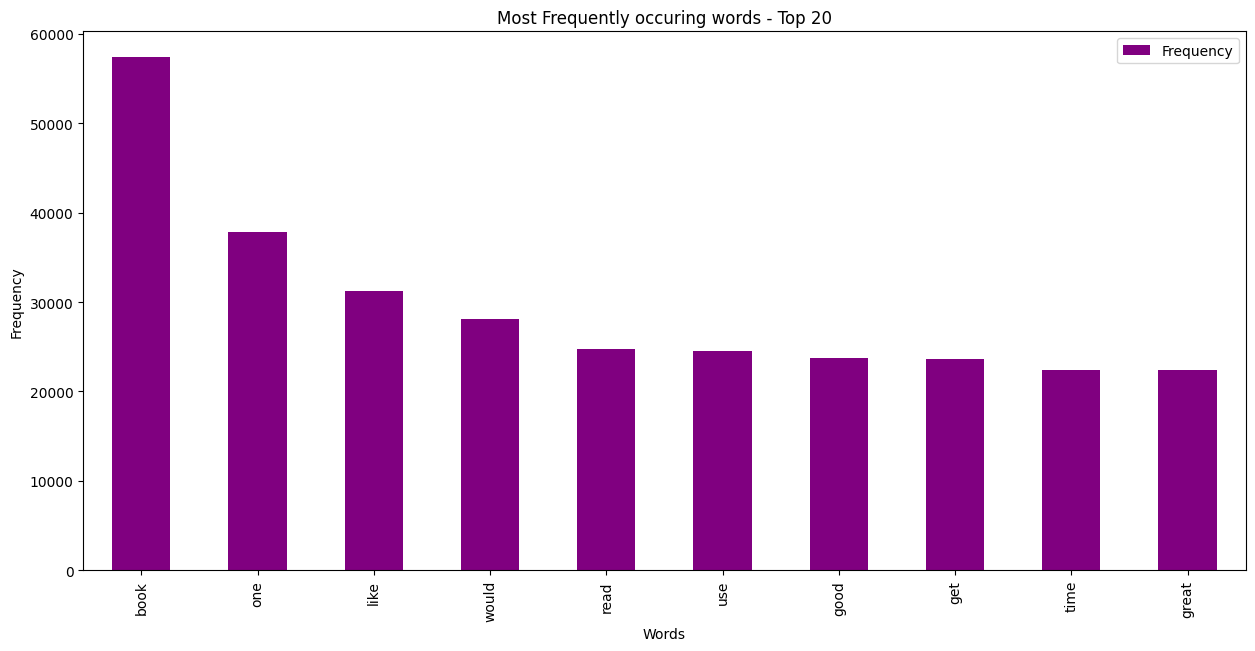

In [45]:
Top10 = Frequency_words[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [46]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 150,
        max_font_size = 30, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)
    plt.imshow(wordcloud)
    plt.show()

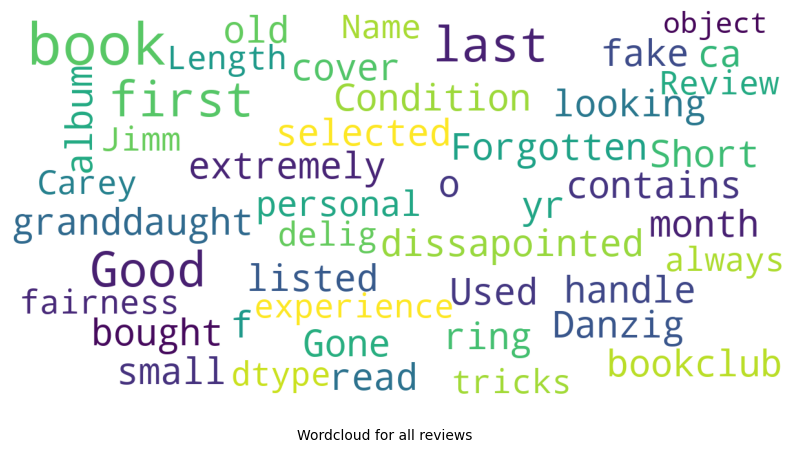

In [47]:
# print wordcloud
reviews_0_rating = df[df['Rating'] == 0]['Review']
show_wordcloud(reviews_0_rating,'Wordcloud for all reviews')

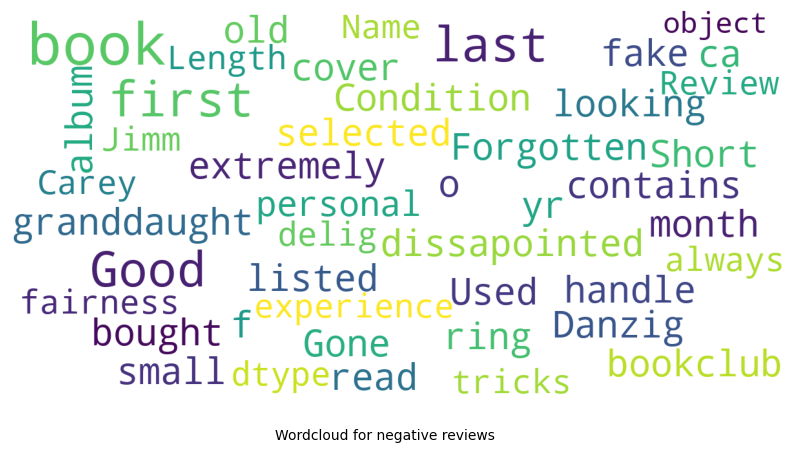

In [48]:
# print wordcloud
reviews_0_rating = df[df['Rating'] == 0]['Review']
show_wordcloud(reviews_0_rating,'Wordcloud for negative reviews')

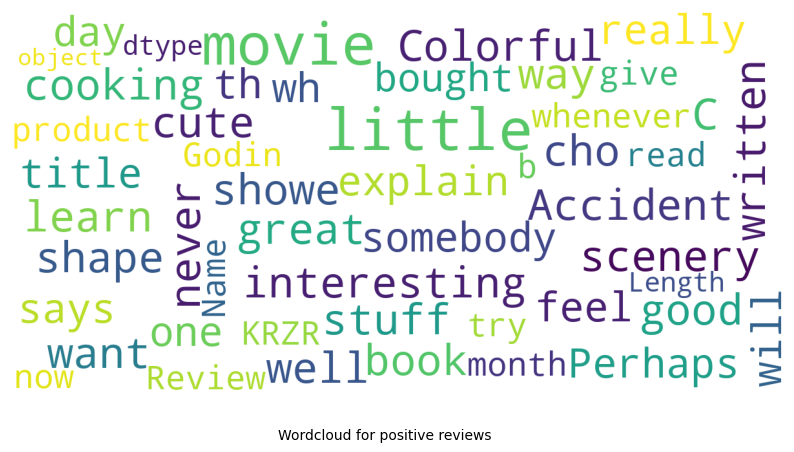

In [49]:
# print wordcloud
reviews_0_rating = df[df['Rating'] == 1]['Review']
show_wordcloud(reviews_0_rating,'Wordcloud for positive reviews')

# Feature Extraction

In [52]:
Tf = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer ='char')
Tf

TfidfVectorizer(analyzer='char', max_features=20000, ngram_range=(1, 3))

In [55]:
#Saving the Count Vectorizer
pickle.dump(Tf, open('Models/TfidfVectorizer.pkl', 'wb'))

In [56]:
X = Tf.fit_transform(df['clean_review'])
y = df['Rating']

# Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) 

In [65]:
#Train a logistic Regression Model on the Training Data
lr = LogisticRegression(max_iter=5000)

# Define the preprocessing steps for numeric features
lr.fit(X_train, y_train)

# Evaluate the model on the testing data
lr_preds = lr.predict(X_test)

# Evaluate the accuracy of the model
lr_accuracy = accuracy_score(y_test, lr_preds)*100
print(f"Accuracy of Linear Regression Model: {lr_accuracy:.2f}%")

Accuracy of Linear Regression Model: 82.00%


In [ ]:
# Instantiate the Random Forest model
rf = RandomForestClassifier()

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
rf_preds = rf.predict(X_test)

# Evaluate the accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_preds) * 100
print(f"Accuracy of Random Forest Model: {rf_accuracy:.2f}%")

In [66]:
#Train a SVC Linear Model on the Training Data
svm = LinearSVC()

# Define the preprocessing steps for numeric features
svm.fit(X_train, y_train)

# Predict the ratings for the test set
svm_preds = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_preds)*100
print(f"Accuracy of SVM Model: {svm_accuracy:.2f}%")

Accuracy of SVM Model: 82.69%


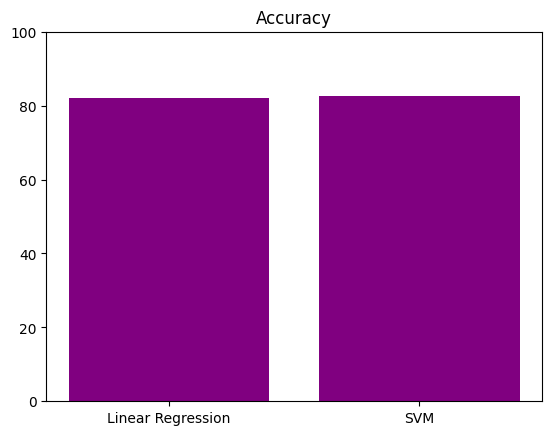

In [67]:
models = ['Linear Regression', 'SVM']
accuracy = [lr_accuracy, svm_accuracy]
plt.bar(models, accuracy)
plt.title('Accuracy')
plt.ylim(0, 100)
plt.show()

In [68]:
def plot_precision_recall_curve(y_true, y_scores, model_name):
    average_precision = average_precision_score(y_true, y_scores)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall Curve')
    plt.fill_between(recall, precision, alpha=0.2, color='navy')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve of {model_name}: AP = {average_precision:.2f}')
    plt.legend(loc="lower left")
    plt.show()

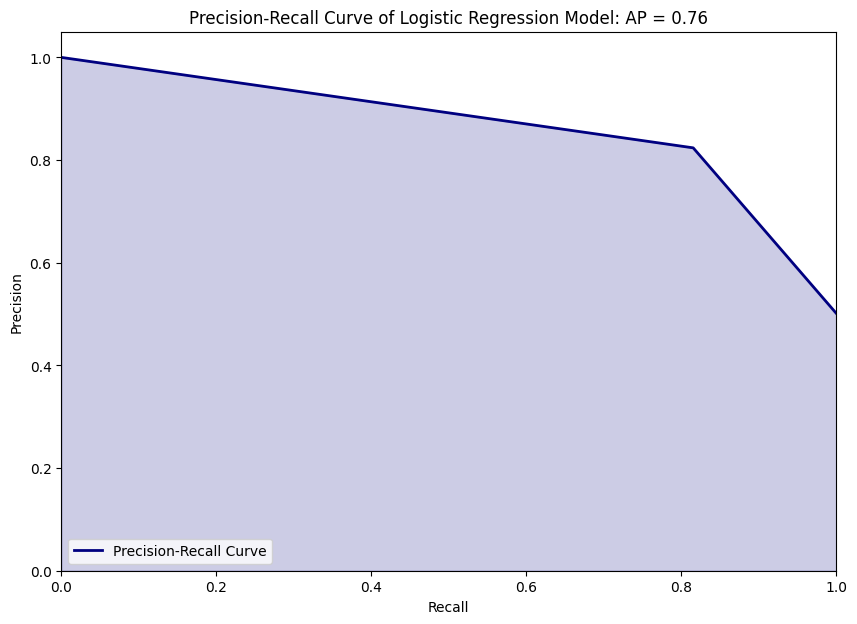

In [69]:
## Precision-Recall Curve of LR model
plot_precision_recall_curve(y_test, lr_preds, 'Logistic Regression Model')

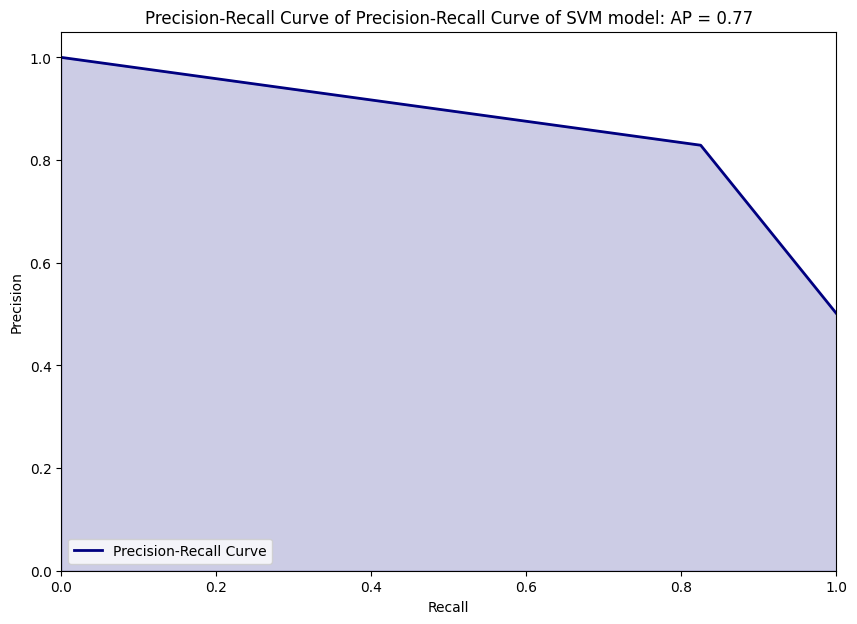

In [70]:
# Precision-Recall Curve of SVM model
plot_precision_recall_curve(y_test, svm_preds, 'Precision-Recall Curve of SVM model')

In [71]:
## Classification report
print(classification_report(y_test,lr_preds))
print(classification_report(y_test,svm_preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      9972
           1       0.82      0.82      0.82     10027

    accuracy                           0.82     19999
   macro avg       0.82      0.82      0.82     19999
weighted avg       0.82      0.82      0.82     19999

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      9972
           1       0.83      0.83      0.83     10027

    accuracy                           0.83     19999
   macro avg       0.83      0.83      0.83     19999
weighted avg       0.83      0.83      0.83     19999



In [72]:
#Saving the Logistic Regression
pickle.dump(lr, open('Models/model_logisticRegression.pkl', 'wb'))

In [73]:
#Saving the Logistic Regression
pickle.dump(svm, open('Models/model_svm.pkl', 'wb'))

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:
#Confusion Matrix for logistic regression
cm = confusion_matrix(y_test, lr_preds)

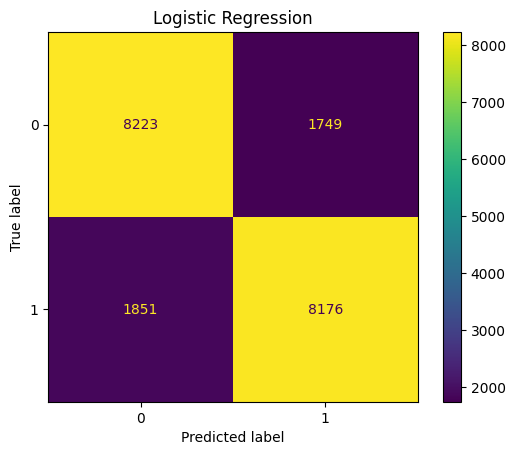

In [77]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
cm_display.plot()
plt.title("Logistic Regression")
plt.show()

In [78]:
#Confusion Matrix for SVM
cm = confusion_matrix(y_test, svm_preds)

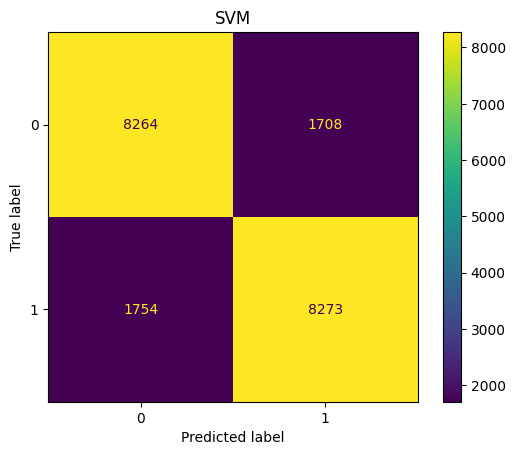

In [79]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
cm_display.plot()
plt.title("SVM")
plt.show()

# Predictions

In [80]:
def predict_sentiment(comment, vectorizer, model):
    vec = vectorizer.transform([comment])
    prediction = model.predict(vec)
    
    if prediction == 0:
        print(colored("Negative", "red"))
    else:
        print(colored("Positive", "blue"))

In [81]:
x = "Lousy product. The quality is very low."
predict_sentiment(x, Tf, svm)

Negative


In [82]:
x1 = "The quality is bad."
predict_sentiment(x1, Tf, lr)

Negative


In [83]:
x2 = "The book is awesome."
predict_sentiment(x2, Tf, svm)

Positive
